## 📊 Day 2 – Exploratory Data Analysis (EDA)

We’ll explore patterns in sales and profit to better understand key business insights from the Superstore data.

## ✅ Step 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional settings
sns.set(style="whitegrid")

## 📥 Step 2: Load the Cleaned Dataset

In [ ]:
# Load the cleaned dataset
df = pd.read_csv("../data/superstore_cleaned.csv")

# Preview dataset
print(f"Shape: {df.shape}")
df.head()

## 📊 Step 3: Sales & Profit by Category and Sub-Category


In [ ]:
# Group by product category and sub-category
cat_subcat_profit = df.groupby(['product_category', 'product_sub-category'])[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=cat_subcat_profit, x='product_sub-category', y='profit', hue='product_category', palette='Set2')
plt.title("Profit by Sub-Category within Each Product Category")
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

## 🗺️ Step 4: Sales & Profit by Region

In [ ]:
region_summary = df.groupby("region")[["sales", "profit"]].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=region_summary, hue='region', y='sales', ax=ax[0], palette="Blues_d")
ax[0].set_title("Total Sales by Region")

sns.barplot(data=region_summary, hue='region', y='profit', ax=ax[1], palette="Greens_d")
ax[1].set_title("Total Profit by Region")

plt.tight_layout()
plt.show()


## 📅 Step 5: Sales Over Time

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.resample('ME', on='order_date')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='order_date', y='sales', label='Sales')
sns.lineplot(data=monthly_sales, x='order_date', y='profit', label='Profit')
plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


## 🧪 Step 6: Correlation Heatmap

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sales', 'profit', 'discount', 'order_quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## 🌐 Step 7: Interactive Scatter Plot

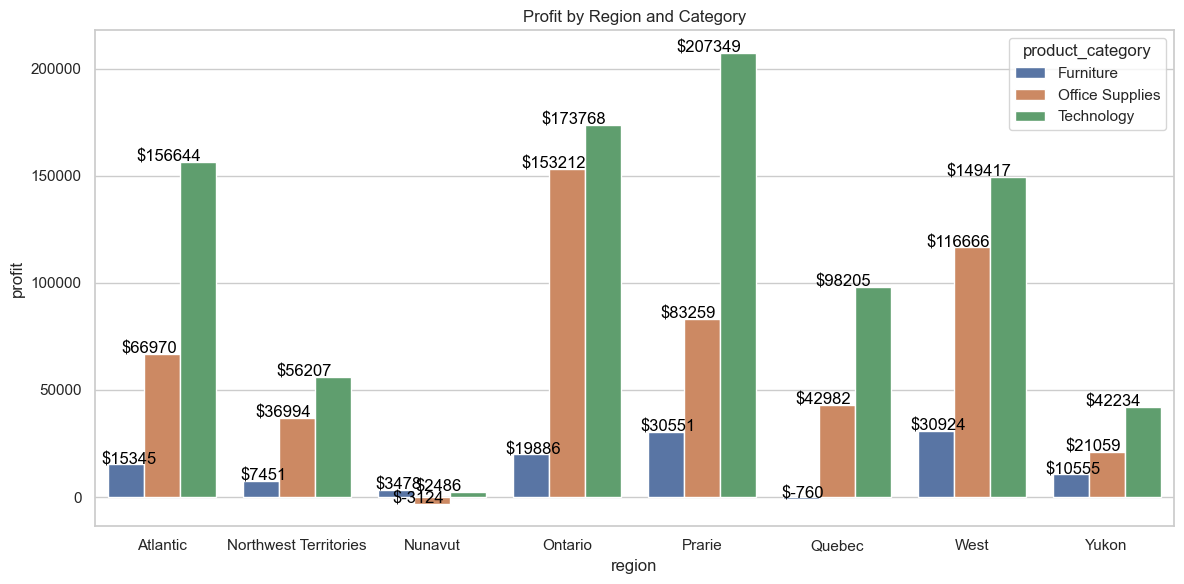

In [13]:
region_summary = df.groupby(['region', 'product_category'])[['sales', 'profit']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Barplot: total profit
sns.barplot(data=region_summary, x='region', y='profit', hue='product_category', ax=ax)

# Scatterplot overlay (optional): simulate interactivity with markers
for i in range(region_summary.shape[0]):
    row = region_summary.iloc[i]
    ax.text(i//3 + (i%3)*0.15 - 0.25, row['profit'] + 50, f"${int(row['profit'])}", color='black', ha='center')

plt.title("Profit by Region and Category")
plt.tight_layout()
plt.show()

## ✅ Summary of Day 2
- Analyzed profit and sales by Sub-Category and Region
- Created monthly trend line plots for Sales and Profit
- Explored correlations among numeric features
- Optional interactive Plotly chart added

🚀 Ready to move to Day 3: Customer Segmentation using RFM Analysis!